#  PROJECT TITLE:  Digits Classification



  






 

# Import the mnist dataset

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
#tf.test.gpu_device_name()

# Load and split the dataset to train set and test set

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Print the data shapes

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
print(train_y)

[5 0 4 ... 5 6 8]


# Reshape the data from (x,28,28) to (x,784)

In [ ]:
import numpy as np
train_X = np.reshape(train_X,(60000,28*28))
test_X = np.reshape(test_X,(10000,28*28))
train_y=np.reshape(train_y,(60000,1))


# Create an array with values (0,5,10, ... , 59995). Take the 1/5 of 60.000 samples.

In [ ]:
a=np.arange(0, train_X.shape[0],5, dtype=int)
print(a)
new_train_X=train_X[a,:]
new_train_y=train_y[a,:]
print(new_train_X.shape)
print(new_train_y.shape)

[    0     5    10 ... 59985 59990 59995]
(12000, 784)
(12000, 1)


# Change the default classes and convert the problem to a binary classification. If a digit is bigger than 4 write 1, otherwise write 0.  

In [ ]:

for i in range (new_train_y.shape[0]):
    if new_train_y[i]<=4:
        new_train_y[i]=0
    else:
        new_train_y[i]=1

for i in range (test_y.shape[0]):
    if test_y[i]<=4:
        test_y[i]=0
    else:
        test_y[i]=1






In [ ]:
print(new_train_y)


[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [ ]:
print(test_y)

[1 0 0 ... 0 1 1]


In [ ]:

print(new_train_y.shape)

print(test_y.shape)

(12000, 1)
(10000,)


In [ ]:
new_train_y=np.reshape(new_train_y,(new_train_y.shape[0],))
print(new_train_y.shape)
test_y=np.reshape(test_y,(test_y.shape[0],))
print(test_y.shape)

(12000,)
(10000,)


# SVM
## Try to run linear kernel

In [ ]:
#linear kernel does not run

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

C=[10, 100]

score=[]
for i in C:
  print(i)
  clf=SVC(kernel='linear',C=i)
  clf.fit(new_train_X, new_train_y)
  y_pred = clf.predict(test_X)
  score.append(accuracy_score(test_y, y_pred))                    
print(score)

100


# Grid search of the parameters

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1,0.1,0.01], "C": [1, 10, 100]},
     {"kernel": ["poly"], "degree" : [2,3,4], "gamma": [1,0.1,0.01], "C": [1, 10, 100]},
     {"kernel": ["sigmoid"],"gamma": [1,0.1,0.01], "C": [1, 10, 100]}
    
]

grid = GridSearchCV(SVC(),tuned_parameters,refit=True,verbose=2,)
print(grid)
grid.fit(new_train_X,new_train_y)
print(grid.best_estimator_)
print(grid.best_estimator_)
grid_predictions = grid.predict(test_X)
print(confusion_matrix(test_y,grid_predictions))
print(classification_report(test_y,grid_predictions))
print(accuracy_score(test_y, grid_predictions))

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [1, 0.1, 0.01], 'kernel': ['poly']},
                         {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                          'kernel': ['sigmoid']}],
             verbose=2)
Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.2min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.2min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.1min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.1min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 2.1min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 2.1min
[CV] END ..............

# Perform a custom search for poly kernel parameters.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


degree=[2,3,4]
gamma=[1,0.1,0.01]
C=[1, 10, 100]

score=[]
for i in C:
    for j in gamma:
        for k in degree:
            
            print(i,j,k)
    
            clf=SVC(kernel='poly', degree=k, gamma=j,C=i)
            clf.fit(new_train_X, new_train_y)
            y_pred = clf.predict(test_X)
            score.append(accuracy_score(test_y, y_pred))                    
print(score)

1 1 2
1 1 3
1 1 4
1 0.1 2
1 0.1 3
1 0.1 4
1 0.01 2
1 0.01 3
1 0.01 4
10 1 2
10 1 3
10 1 4
10 0.1 2
10 0.1 3
10 0.1 4
10 0.01 2
10 0.01 3
10 0.01 4
100 1 2
100 1 3
100 1 4
100 0.1 2
100 0.1 3
100 0.1 4
100 0.01 2
100 0.01 3
100 0.01 4
[0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703, 0.9667, 0.9718, 0.9703]


# print max score

In [ ]:
max(score)


0.9718

# Test the score of the poly kernel

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

clf=SVC(kernel='poly', degree=3, gamma=1,C=1)
clf.fit(new_train_X, new_train_y)
y_pred = clf.predict(test_X)
best_score=(accuracy_score(test_y, y_pred))   

In [ ]:
print(best_score)

0.9718


# SVM + PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
k=np.arange(100, 784,2, dtype=int)
scores=[]

for i in k:
  print(i)
  pca = PCA(n_components=i)
  pca.fit(new_train_X)
  X_train_pca = pca.transform(new_train_X)
  X_test_pca = pca.transform(test_X)
  clf=SVC(kernel='poly', degree=3, gamma=1,C=1)
  clf.fit(X_train_pca, new_train_y)
  y_pred = clf.predict(X_test_pca)
  scores.append((accuracy_score(test_y, y_pred)))
  
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526
528
530
532
534
536
538
540
542
544
546
548
550
552
554
556
558
560
562
564
566
568
570
572
574
576
578
580
582
584
586
588
590
592
594
596
598


"\npca = PCA(n_components=300)\n  \npca.fit(new_train_X)\nX_train_pca = pca.transform(new_train_X)\nX_test_pca = pca.transform(test_X)\nprint(X_train_pca.shape)\nprint(X_test_pca.shape)\nclf=SVC(kernel='poly', degree=3, gamma=1,C=1)\nclf.fit(X_train_pca, new_train_y)\ny_pred = clf.predict(X_test_pca)\nscore=((accuracy_score(test_y, y_pred)))\nprint(score)\n"

# Print scores

In [ ]:
print(scores)

[0.9743, 0.9737, 0.974, 0.9739, 0.9745, 0.974, 0.9743, 0.9743, 0.974, 0.9742, 0.9742, 0.9747, 0.9744, 0.9745, 0.9743, 0.9749, 0.9746, 0.9746, 0.9749, 0.9746, 0.9743, 0.9746, 0.9747, 0.9747, 0.9746, 0.9743, 0.975, 0.9746, 0.9749, 0.9747, 0.9747, 0.9746, 0.9747, 0.9746, 0.9749, 0.9749, 0.9748, 0.9745, 0.9747, 0.975, 0.9748, 0.9747, 0.9752, 0.975, 0.9749, 0.9751, 0.9749, 0.9753, 0.9753, 0.9749, 0.9755, 0.9754, 0.9755, 0.9752, 0.975, 0.9753, 0.975, 0.9752, 0.9754, 0.9754, 0.9754, 0.9753, 0.9753, 0.9754, 0.9751, 0.9754, 0.9754, 0.9752, 0.9752, 0.975, 0.9752, 0.9751, 0.9752, 0.9753, 0.975, 0.9752, 0.975, 0.9752, 0.9751, 0.975, 0.9753, 0.9749, 0.9753, 0.9751, 0.9753, 0.9751, 0.9754, 0.9754, 0.9754, 0.9756, 0.9753, 0.9754, 0.9754, 0.9754, 0.9754, 0.9753, 0.9755, 0.9753, 0.9754, 0.9754, 0.9756, 0.9753, 0.9752, 0.9752, 0.9752, 0.9753, 0.9754, 0.9754, 0.9753, 0.9753, 0.9753, 0.9753, 0.9753, 0.9753, 0.9755, 0.9753, 0.9752, 0.9754, 0.9753, 0.9753, 0.975, 0.9752, 0.9753, 0.9753, 0.9753, 0.975, 0.975

# print max scores

In [ ]:
print(max(scores))

0.9756


# plot (k,scores) graph 

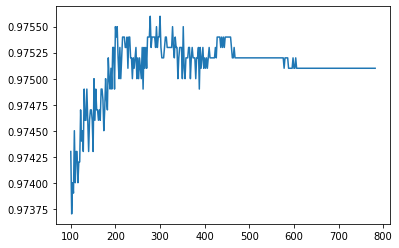

In [ ]:
plt.plot(k,scores)
plt.show()

# SVM + LDA

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
x_train_lda = lda.fit(new_train_X, new_train_y).transform(new_train_X)
x_test_lda=lda.fit(test_X, test_y).transform(test_X)
print(x_train_lda.shape)
print(x_test_lda.shape)
clf=SVC(kernel='poly',degree=3, gamma=1,C=1)
clf.fit(x_train_lda, new_train_y)
y_pred = clf.predict(x_test_lda)
score=(accuracy_score(test_y, y_pred))

(12000, 1)
(10000, 1)


# print score

In [ ]:
print(score)

0.8673


# plot the test data after the lda

[   0    1    2 ... 9997 9998 9999]
[[ 1.483668  ]
 [-1.56859582]
 [-1.69281518]
 ...
 [ 1.25286261]
 [ 1.61709154]
 [ 2.24776606]]


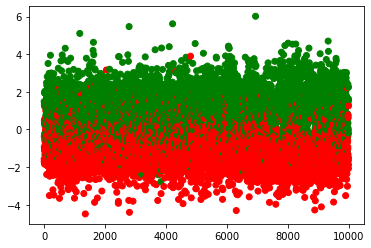

In [ ]:
import seaborn as sns
vec=np.arange(0, 10000,1, dtype=int)
print(vec)
print(x_test_lda)
color= ['red' if i == 0 else 'green' for i in test_y]
plt.scatter(vec, x_test_lda, color=color)

# SVM + LDA + PCA

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
k_new=np.arange(1,784,30)
print(new_train_X.shape)
print(test_X.shape)
scores=[]
for i in k_new:

  print(i)
  pca = PCA(n_components=i)
  pca.fit(new_train_X)
  X_train_pca = pca.transform(new_train_X)
  X_test_pca = pca.transform(test_X)


  lda = LinearDiscriminantAnalysis(n_components=1)
  x_train_pca_lda = lda.fit(X_train_pca, new_train_y).transform(X_train_pca)
  x_test_pca_lda=lda.fit(X_test_pca, test_y).transform(X_test_pca)
  
  clf=SVC(kernel='poly',degree=3, gamma=1,C=1)
  clf.fit(x_train_pca_lda, new_train_y)
  y_pred = clf.predict(x_test_pca_lda)
  scores.append((accuracy_score(test_y, y_pred)))

(12000, 784)
(10000, 784)
1
31
61
91
121
151
181
211
241
271
301
331
361
391
421
451
481
511
541
571
601
631
661
691
721
751
781


# print the scores

In [ ]:
print(scores)

[0.5139, 0.8051, 0.8217, 0.8393, 0.843, 0.8495, 0.8559, 0.8553, 0.8589, 0.8583, 0.8583, 0.8558, 0.8589, 0.8608, 0.8635, 0.8619, 0.8652, 0.8652, 0.8663, 0.8674, 0.8651, 0.8678, 0.8676, 0.8673, 0.8673, 0.8673, 0.8673]


# print the max score

In [ ]:
print(max(scores))

0.8678


In [ ]:
print(x_train_pca_lda.shape)
print(x_test_pca_lda.shape)

(12000, 1)
(10000, 1)
